<a href="https://www.kaggle.com/code/atifmasih/clf-algorithms-for-drugs-addiction-in-students?scriptVersionId=187780407" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-drugs-addiction-dataset/Students drugs Addiction Dataset/Student_Drugs_Addiction_Training_ Dataset/student_addiction_dataset_train.csv
/kaggle/input/students-drugs-addiction-dataset/Students drugs Addiction Dataset/Student_Drugs_Addiction_Testing_ Dataset/student_addiction_dataset_test.csv


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load datasets

In [3]:
# Train dataset
df_train = pd.read_csv(r"/kaggle/input/students-drugs-addiction-dataset/Students drugs Addiction Dataset/Student_Drugs_Addiction_Training_ Dataset/student_addiction_dataset_train.csv", delimiter=',')

# Test dataset
df_test = pd.read_csv(r"/kaggle/input/students-drugs-addiction-dataset/Students drugs Addiction Dataset/Student_Drugs_Addiction_Testing_ Dataset/student_addiction_dataset_test.csv", delimiter=',')

In [4]:
df_train.shape

(50342, 11)

In [5]:
df_test.shape

(12744, 11)

Data is initially splitted in 80% train and 20% test. We concat both datasets

In [6]:
# Combinar los conjuntos de datos
df_train = pd.concat([df_train, df_test], ignore_index=True)

### 2. Analyze the data

In [7]:
df_train.head(10)

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,Yes,No,No,Yes,No,No,No,Yes,No,No,No
1,No,Yes,NaN,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
2,No,No,No,No,No,Yes,Yes,Yes,No,No,No
3,Yes,No,Yes,Yes,No,Yes,No,No,No,Yes,Yes
4,Yes,Yes,No,NaN,No,Yes,Yes,Yes,No,No,Yes
5,Yes,Yes,No,No,No,Yes,Yes,Yes,No,No,No
6,Yes,No,No,No,No,Yes,NaN,No,Yes,No,No
7,No,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No
8,No,No,No,Yes,Yes,No,No,No,Yes,No,No
9,Yes,No,Yes,No,Yes,NaN,Yes,Yes,No,Yes,No


In [8]:
df_train.describe()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
count,59879,59903,59859,59929,59967,59824,59911,59896,59821,59979,63086
unique,2,2,2,2,2,2,2,2,2,2,2
top,No,No,No,No,No,No,No,No,No,No,No
freq,32175,32203,32246,32204,32298,32255,32123,32334,32028,32201,45375


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63086 entries, 0 to 63085
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Experimentation                     59879 non-null  object
 1   Academic_Performance_Decline        59903 non-null  object
 2   Social_Isolation                    59859 non-null  object
 3   Financial_Issues                    59929 non-null  object
 4   Physical_Mental_Health_Problems     59967 non-null  object
 5   Legal_Consequences                  59824 non-null  object
 6   Relationship_Strain                 59911 non-null  object
 7   Risk_Taking_Behavior                59896 non-null  object
 8   Withdrawal_Symptoms                 59821 non-null  object
 9   Denial_and_Resistance_to_Treatment  59979 non-null  object
 10  Addiction_Class                     63086 non-null  object
dtypes: object(11)
memory usage: 5.3+ MB


### 3. Data cleaning

In [10]:
df_train.isnull().sum()

Experimentation                       3207
Academic_Performance_Decline          3183
Social_Isolation                      3227
Financial_Issues                      3157
Physical_Mental_Health_Problems       3119
Legal_Consequences                    3262
Relationship_Strain                   3175
Risk_Taking_Behavior                  3190
Withdrawal_Symptoms                   3265
Denial_and_Resistance_to_Treatment    3107
Addiction_Class                          0
dtype: int64

In [11]:
df_train_copy = df_train.copy()
df_train_copy.dropna(inplace=True)
df_train_copy.shape

(37588, 11)

Aplying dropna to our missing values would reduce the dataset in a 40% from the original data. Let's analyze the missing values.

<Axes: >

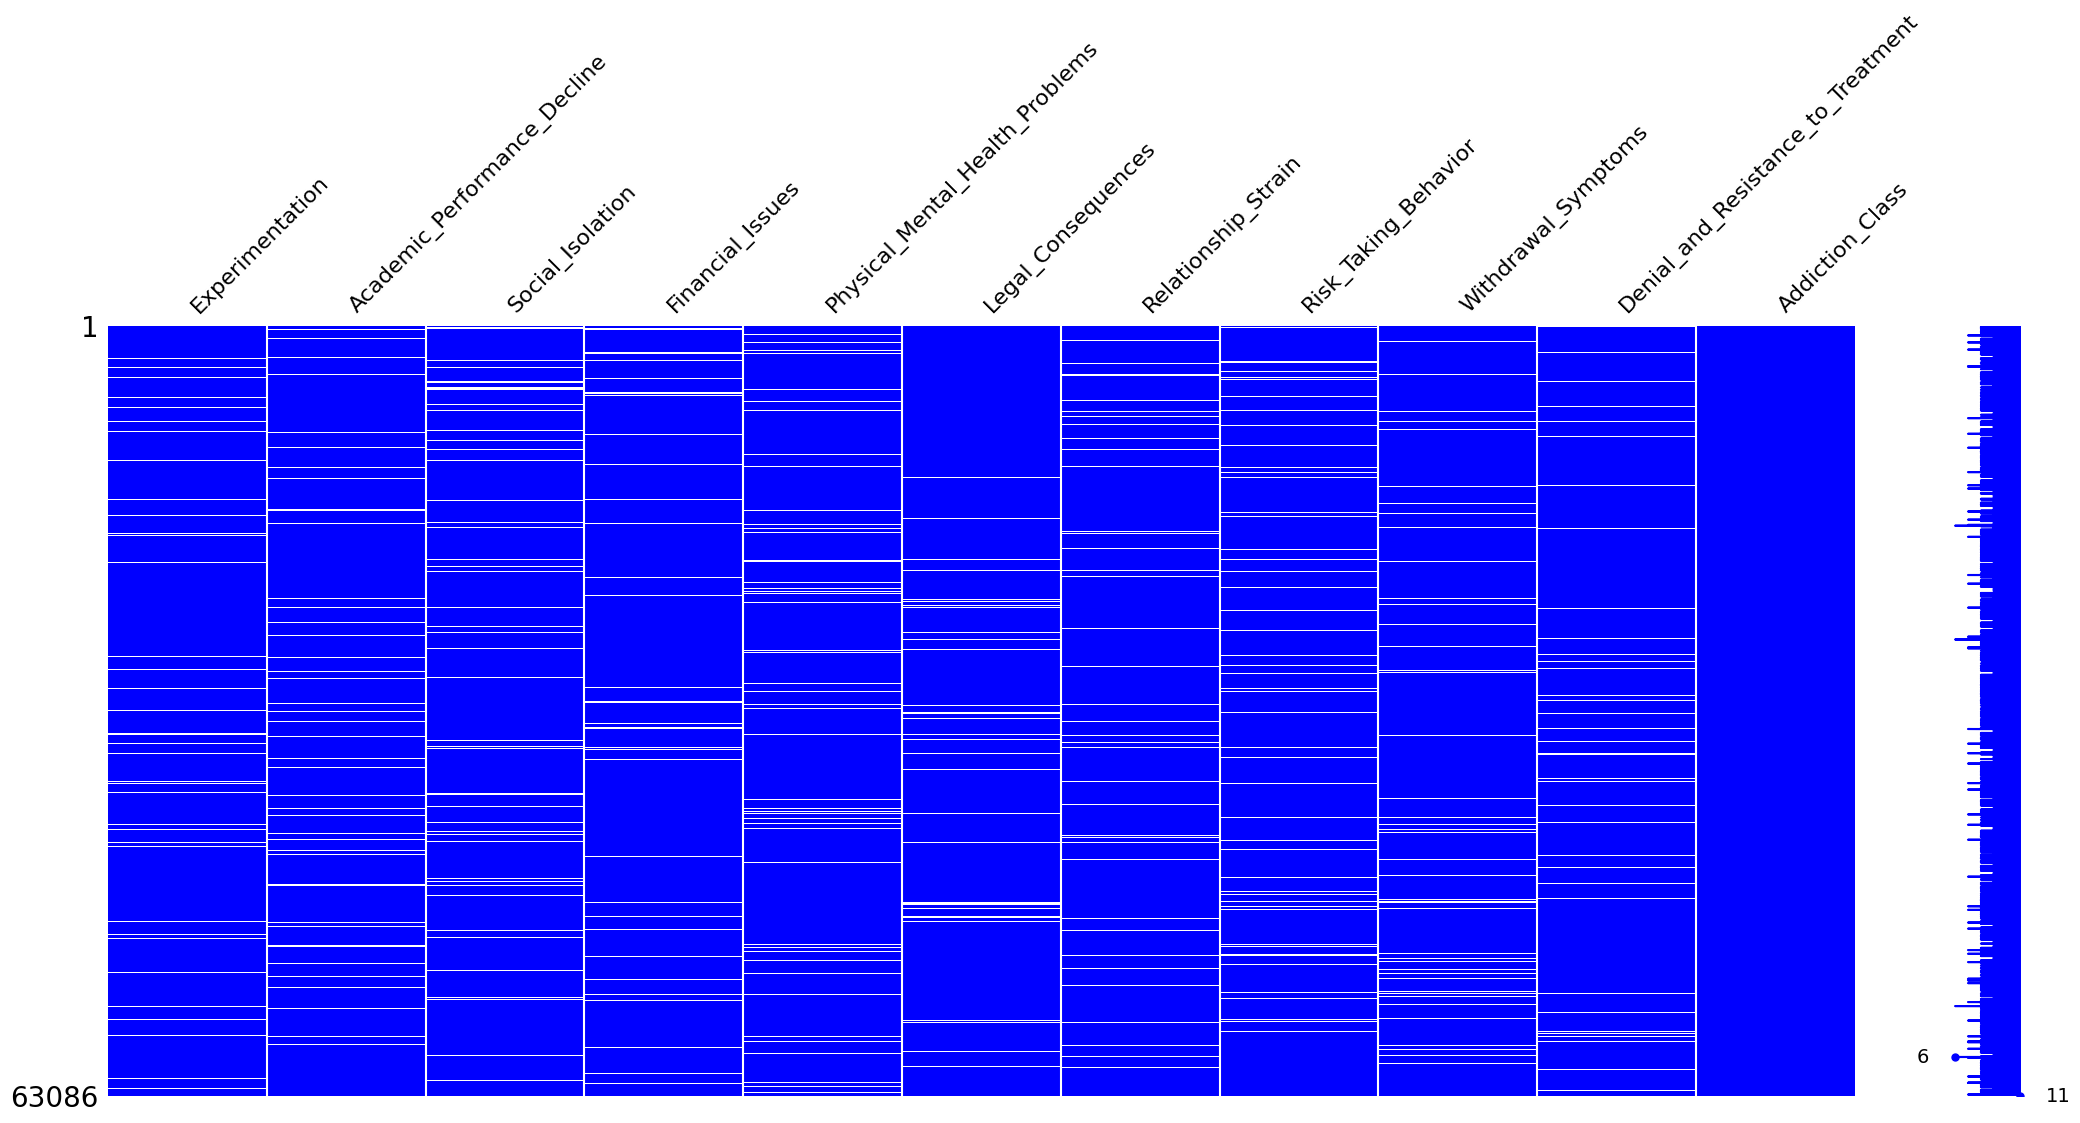

In [12]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df_train, color = (0, 0, 1))

<Axes: >

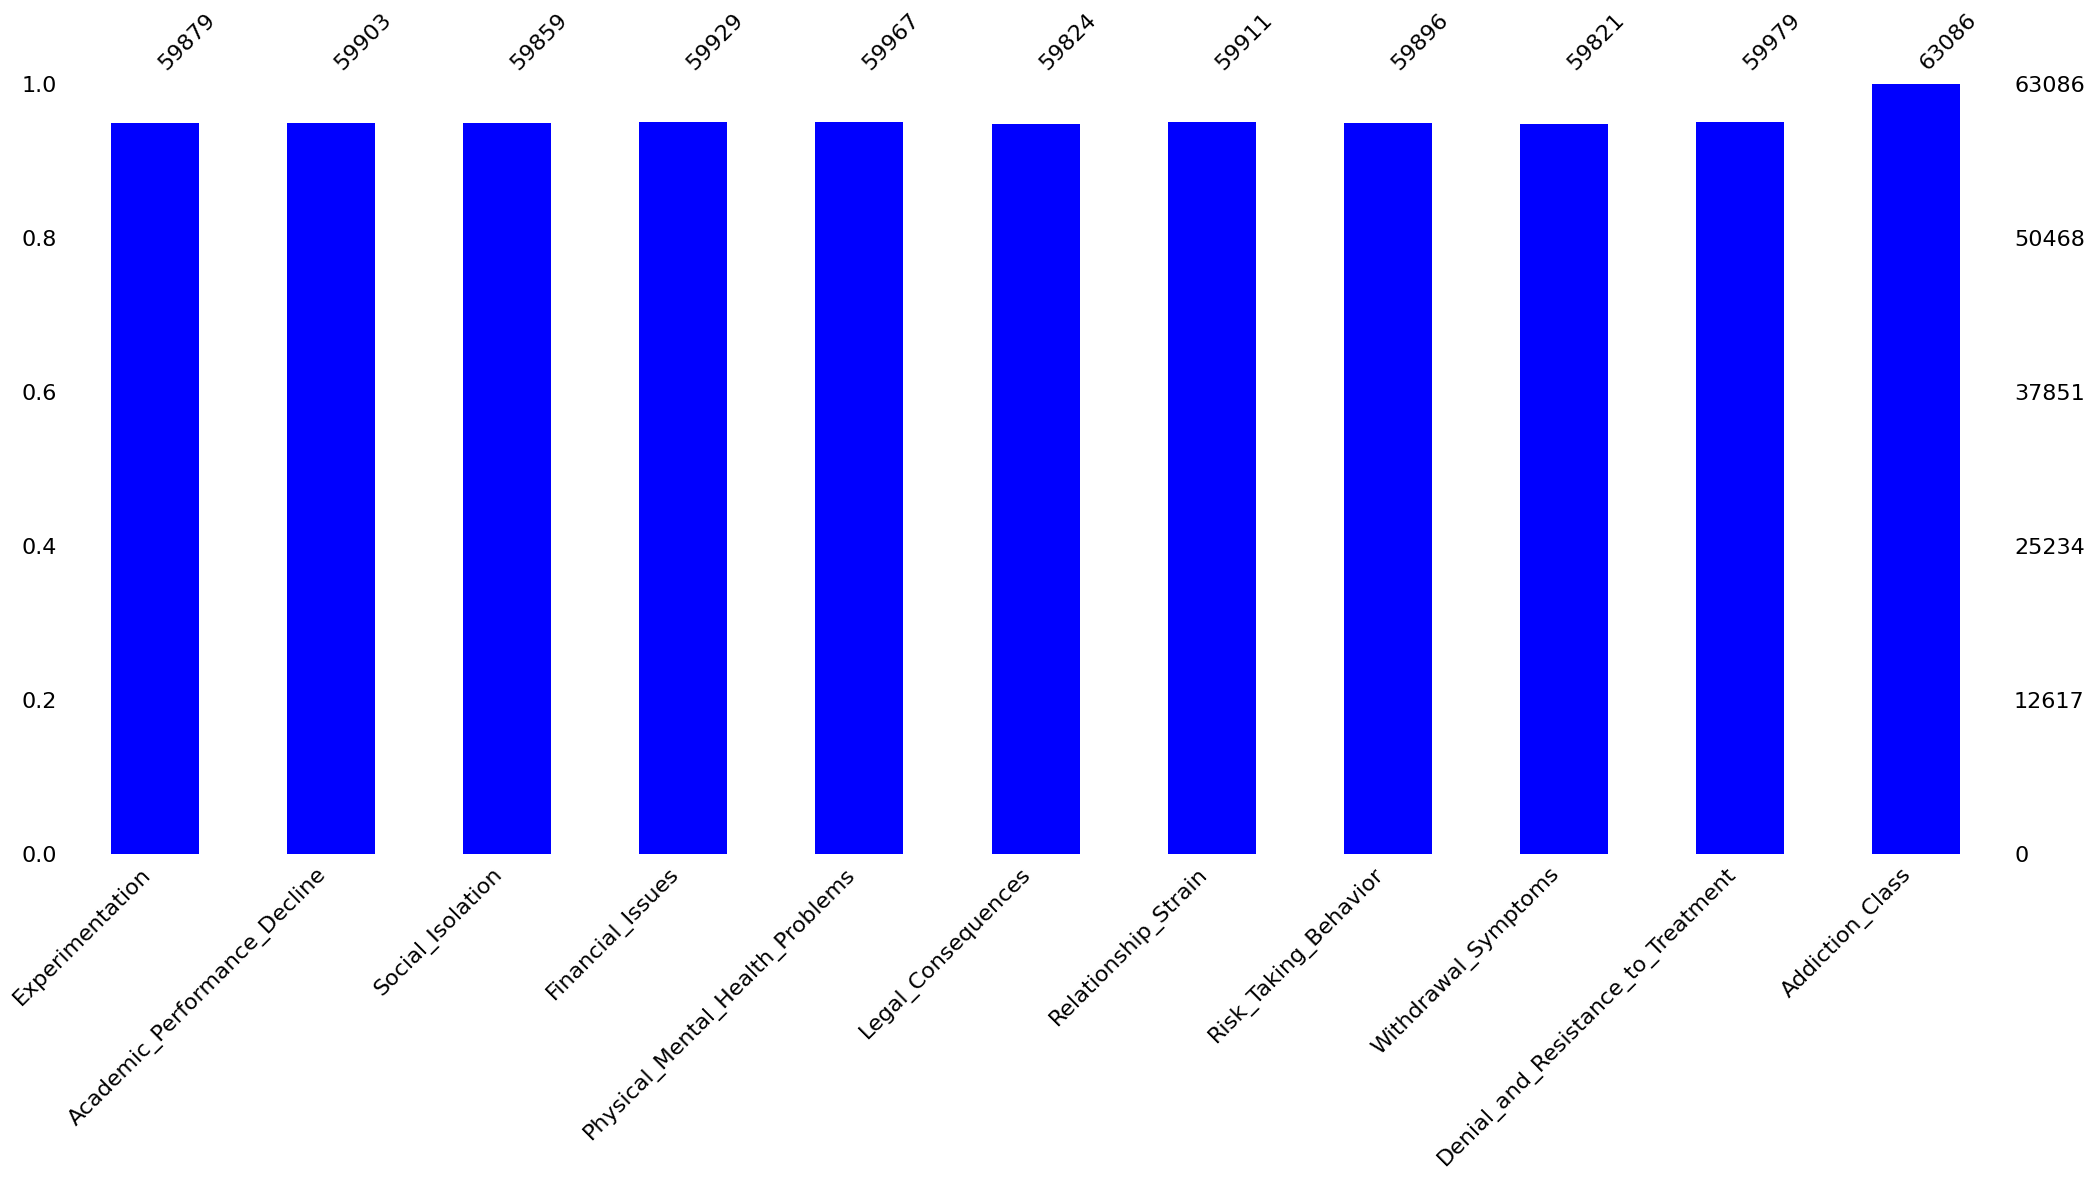

In [13]:
msno.bar(df_train, color = (0, 0, 1))

<Axes: >

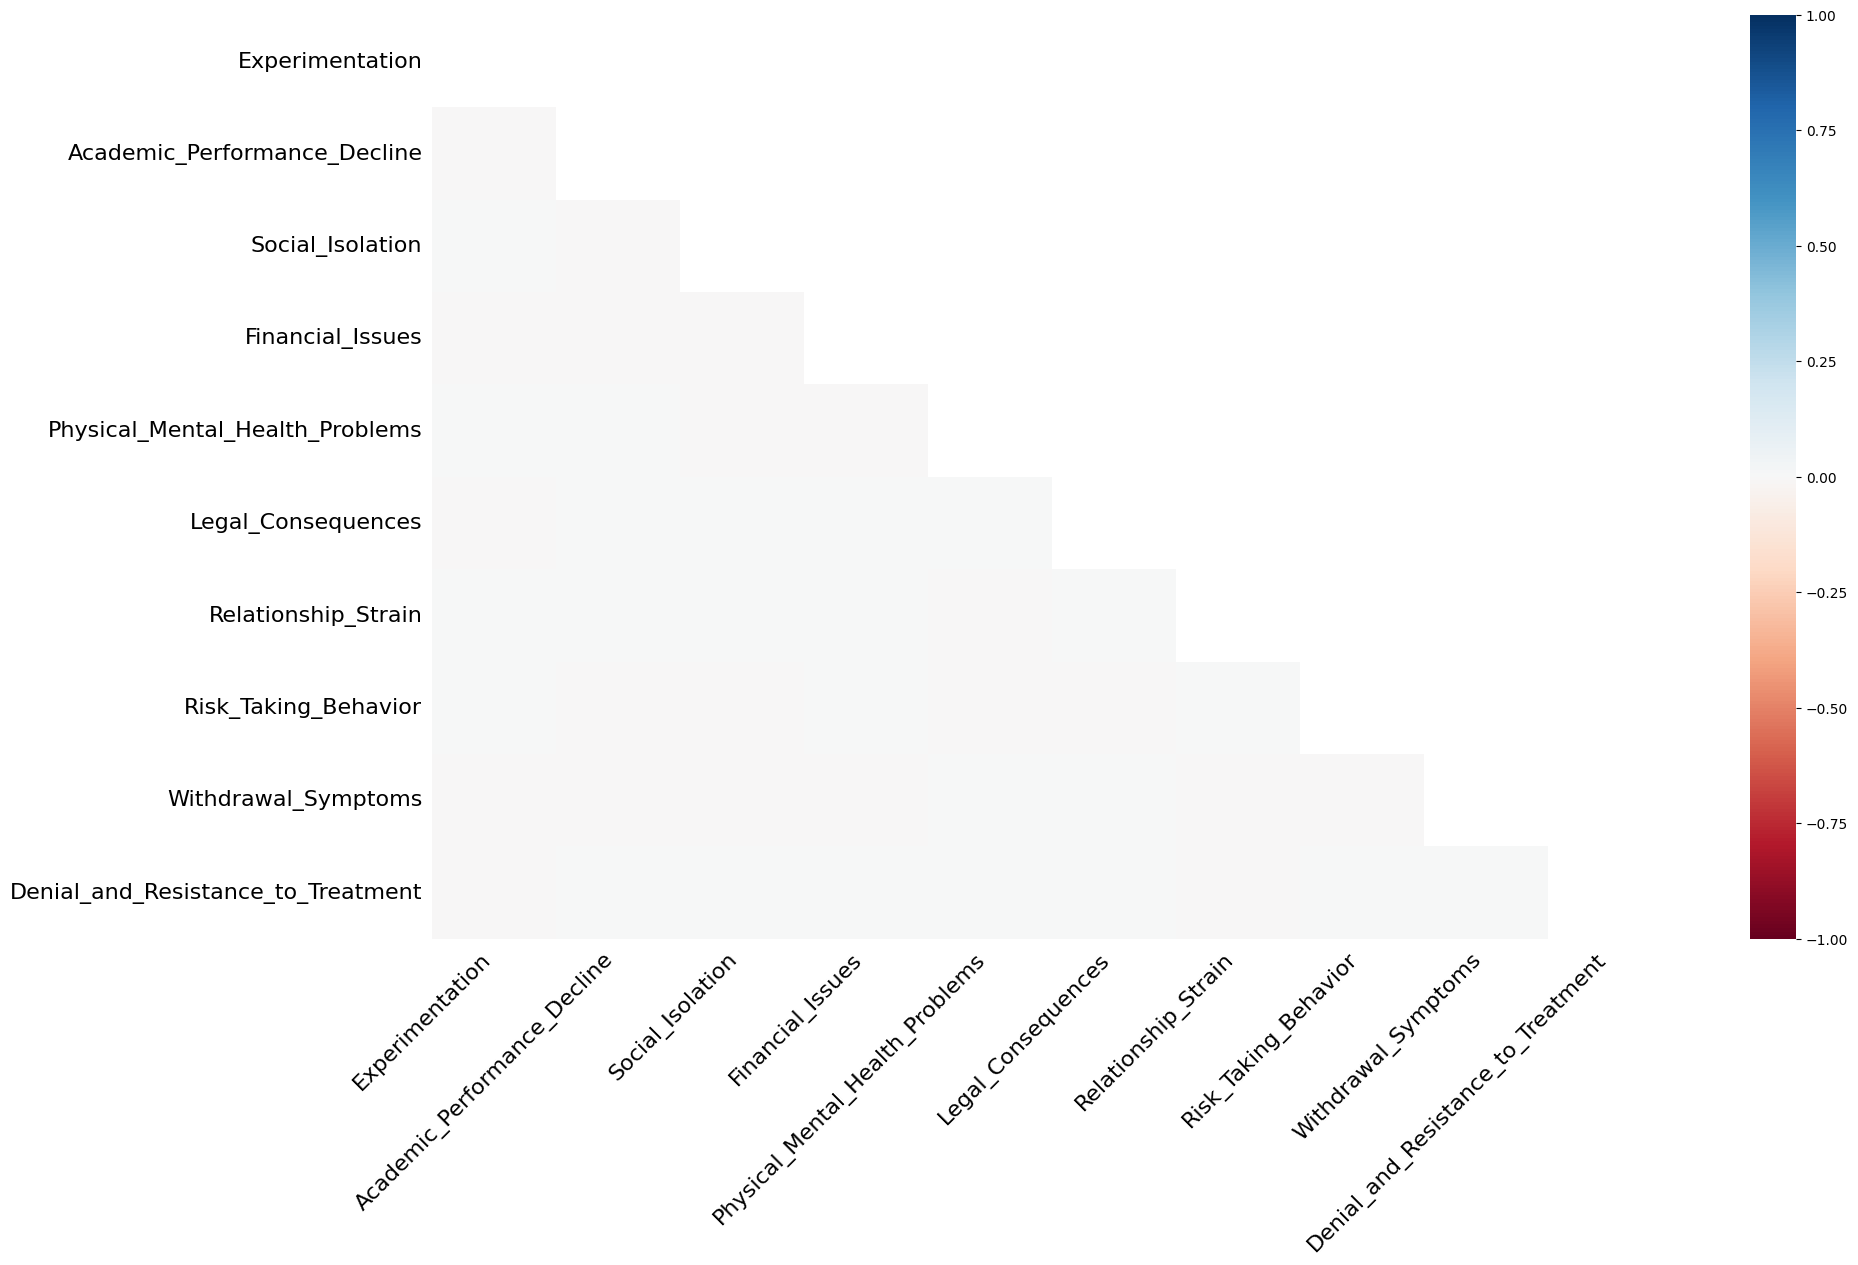

In [14]:
msno.heatmap(df_train) 

There is no correlation among the missing values. Let's check number of missing values per observation

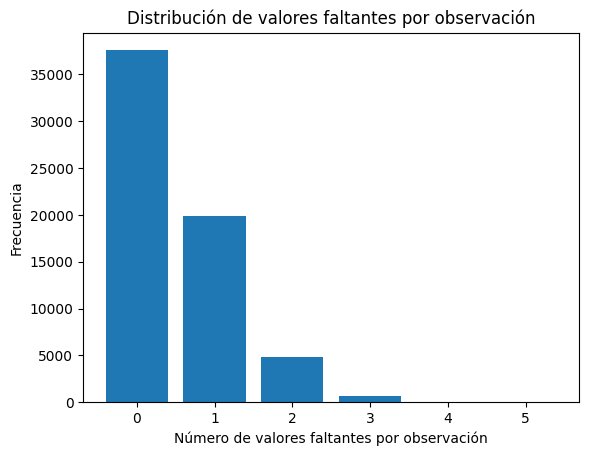

In [15]:
# Contar los valores faltantes por observación
missing_per_row = df_train.isna().sum(axis=1)

# Visualizar la distribución de valores faltantes por observación
plt.hist(missing_per_row, bins=range(missing_per_row.max() + 2), align='left', rwidth=0.8)
plt.xlabel('Número de valores faltantes por observación')
plt.ylabel('Frecuencia')
plt.title('Distribución de valores faltantes por observación')
plt.show()

We are going to impute by mode the missing values as we do not have so many observations with more than 2 missing values

In [16]:
from sklearn.impute import SimpleImputer

# Crear el imputador para la moda
imputer = SimpleImputer(strategy='most_frequent')

# Aplicar el imputador a todo el DataFrame
df_train_imputed = pd.DataFrame(imputer.fit_transform(df_train), columns=df_train.columns)

In [17]:
df_train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63086 entries, 0 to 63085
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Experimentation                     63086 non-null  object
 1   Academic_Performance_Decline        63086 non-null  object
 2   Social_Isolation                    63086 non-null  object
 3   Financial_Issues                    63086 non-null  object
 4   Physical_Mental_Health_Problems     63086 non-null  object
 5   Legal_Consequences                  63086 non-null  object
 6   Relationship_Strain                 63086 non-null  object
 7   Risk_Taking_Behavior                63086 non-null  object
 8   Withdrawal_Symptoms                 63086 non-null  object
 9   Denial_and_Resistance_to_Treatment  63086 non-null  object
 10  Addiction_Class                     63086 non-null  object
dtypes: object(11)
memory usage: 5.3+ MB


### 4. Data visualization

Tarjet variable distribution

<Axes: xlabel='Addiction_Class', ylabel='count'>

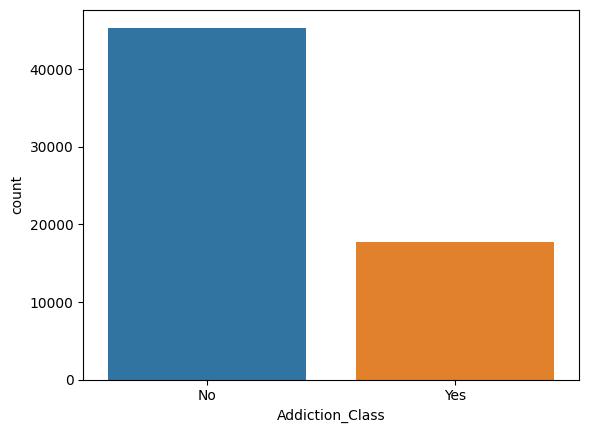

In [18]:
sns.countplot(x=df_train_imputed['Addiction_Class'])

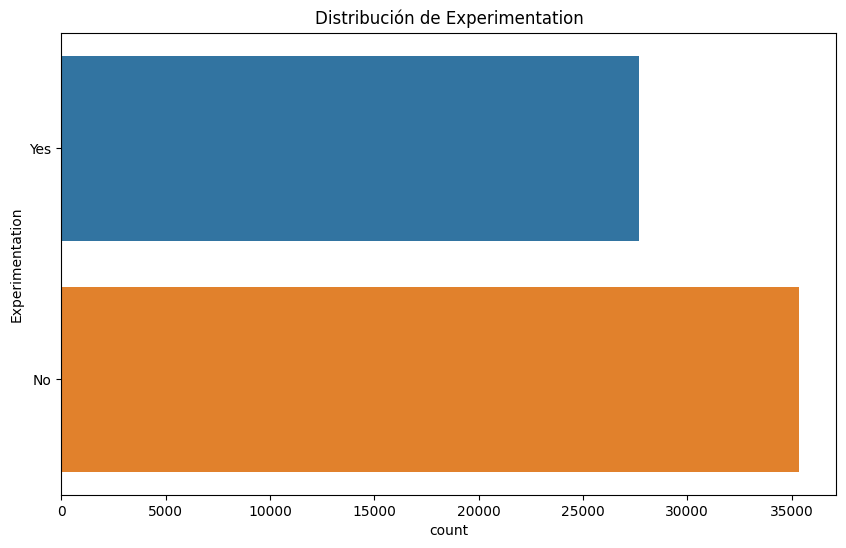

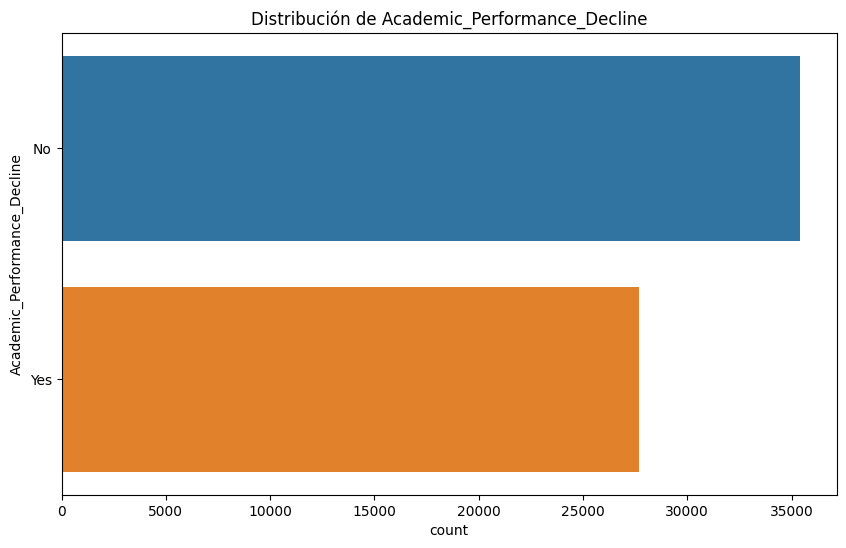

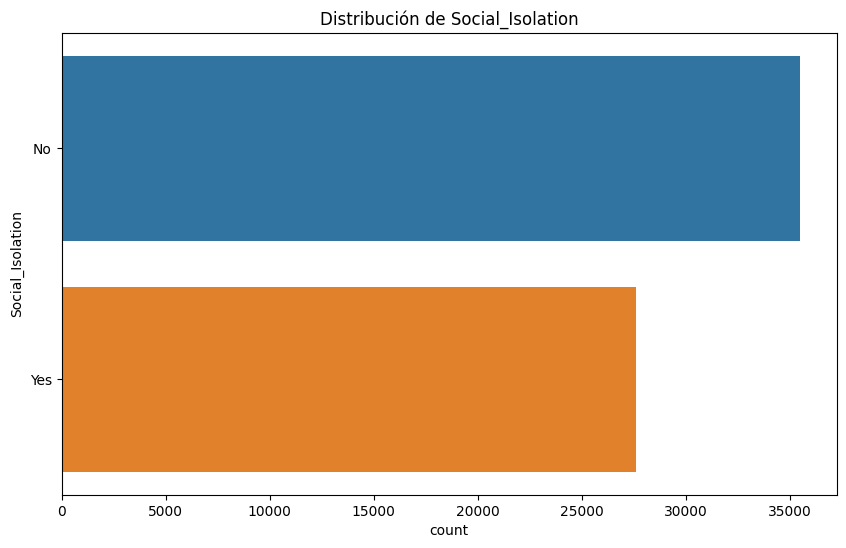

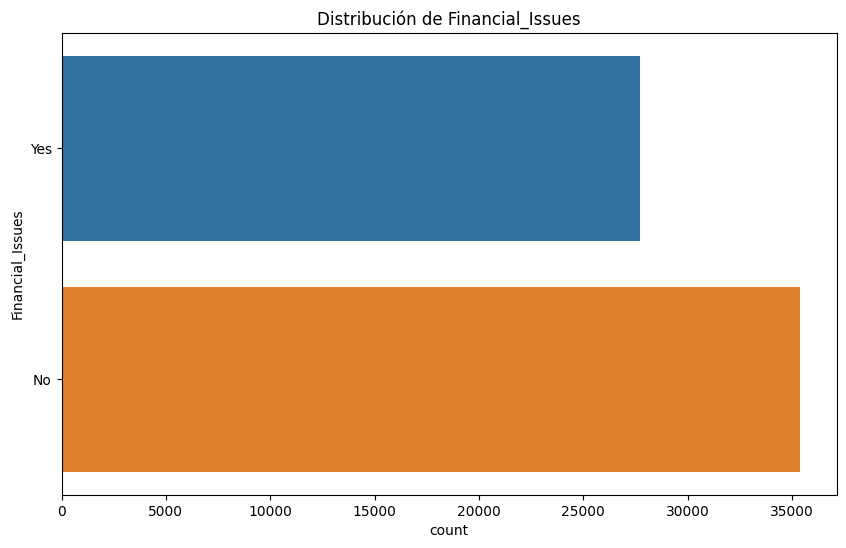

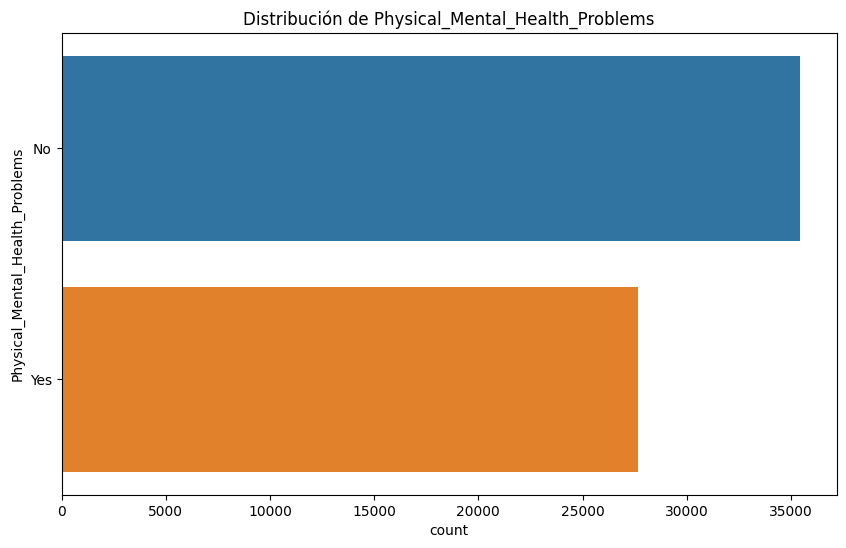

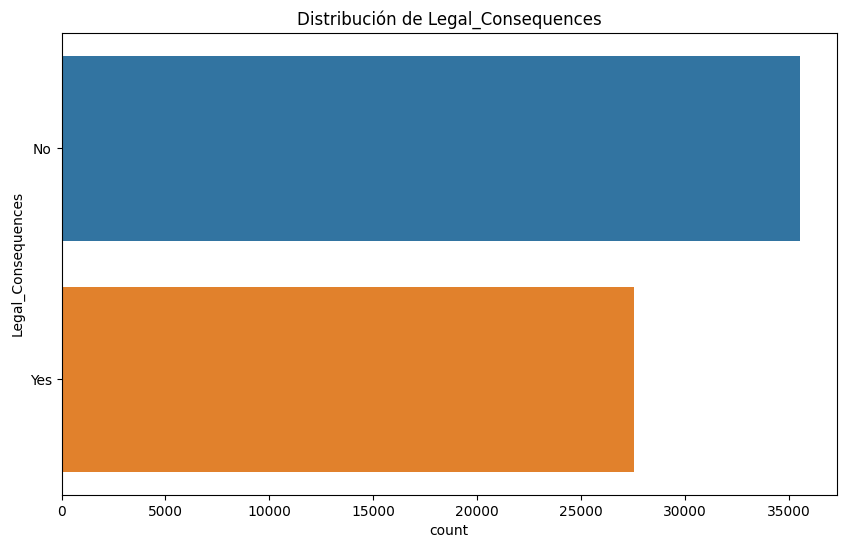

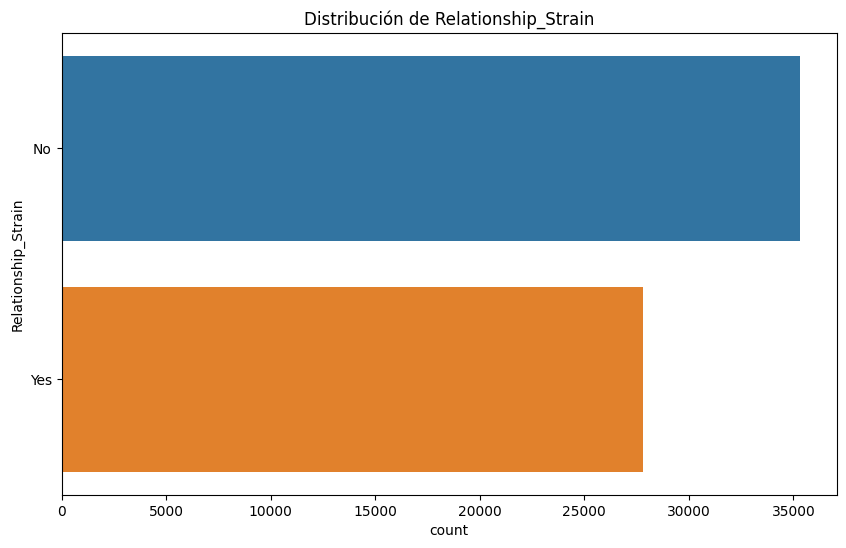

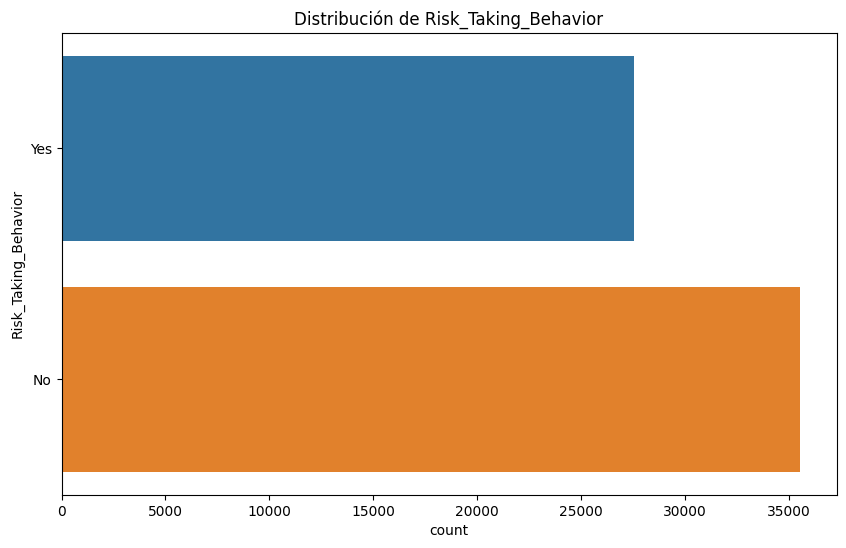

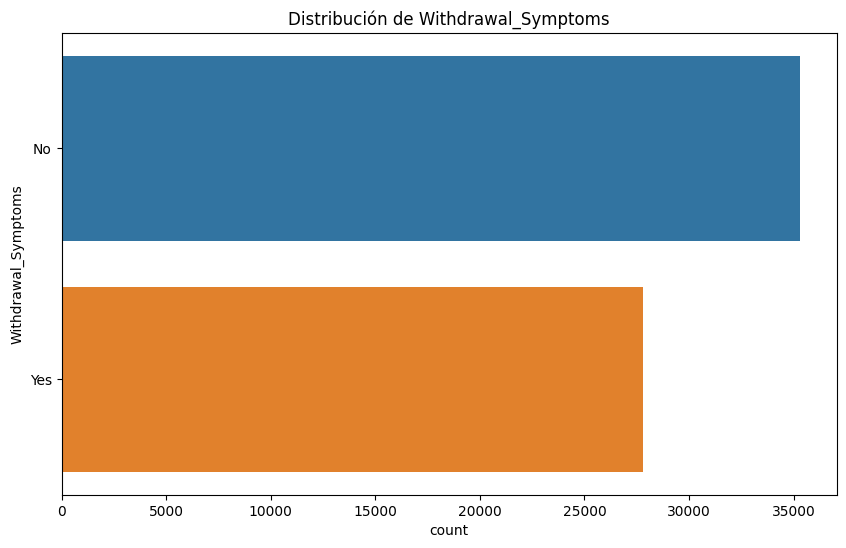

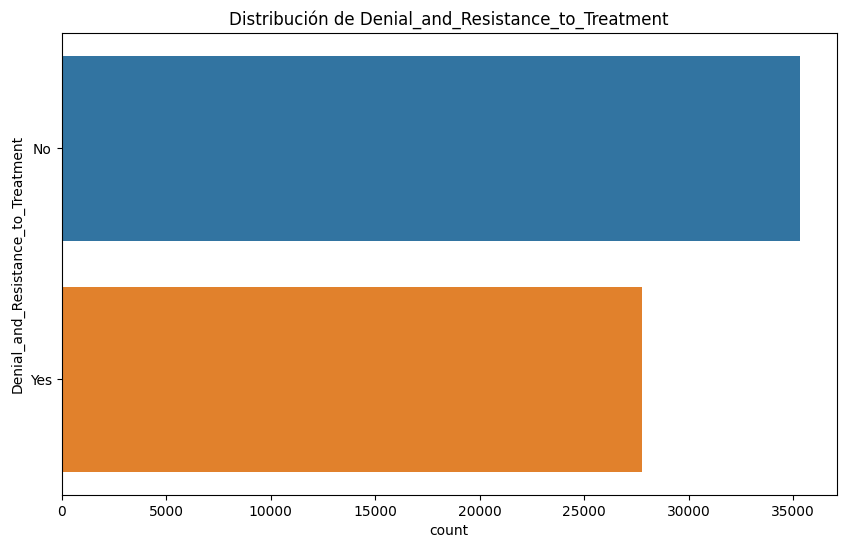

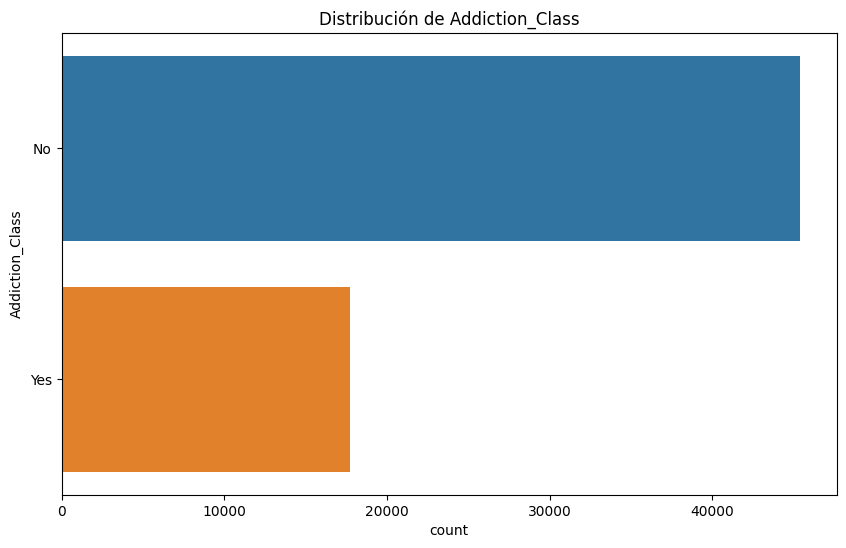

In [19]:
# Variables categóricas
categorical_columns = df_train_imputed.select_dtypes(include=['object']).columns

# Graficar la distribución de cada variable categórica
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df_train_imputed[column])
    plt.title(f'Distribución de {column}')
    plt.show()

Bivariable analysis

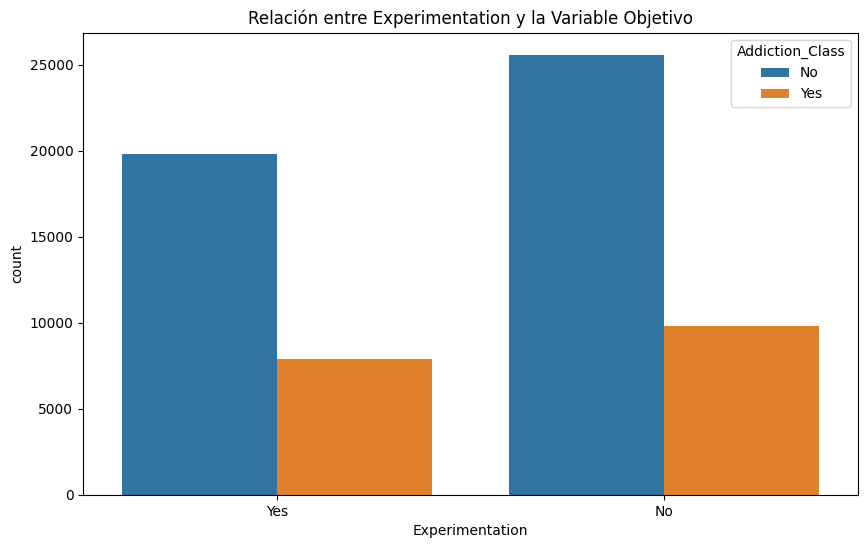

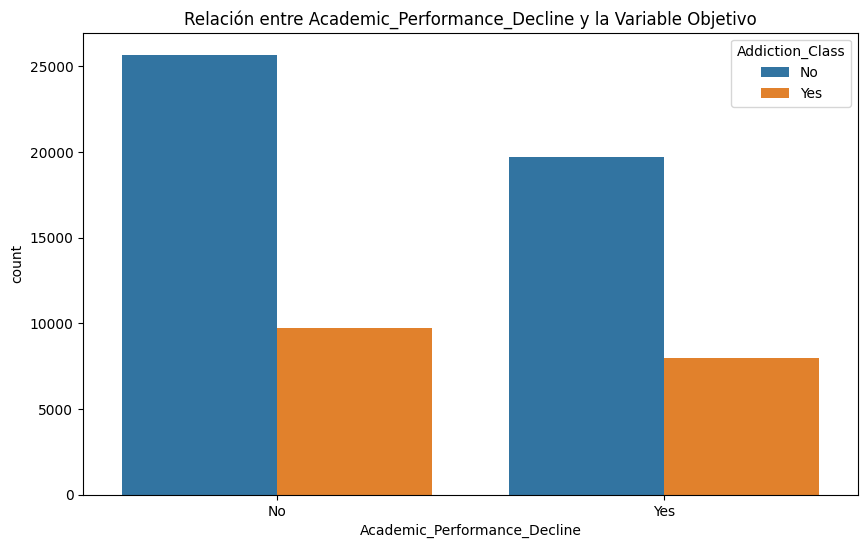

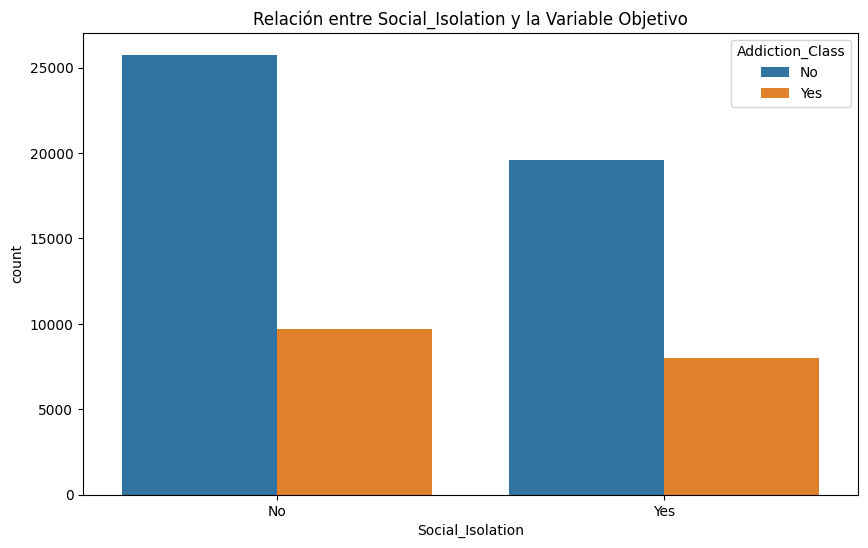

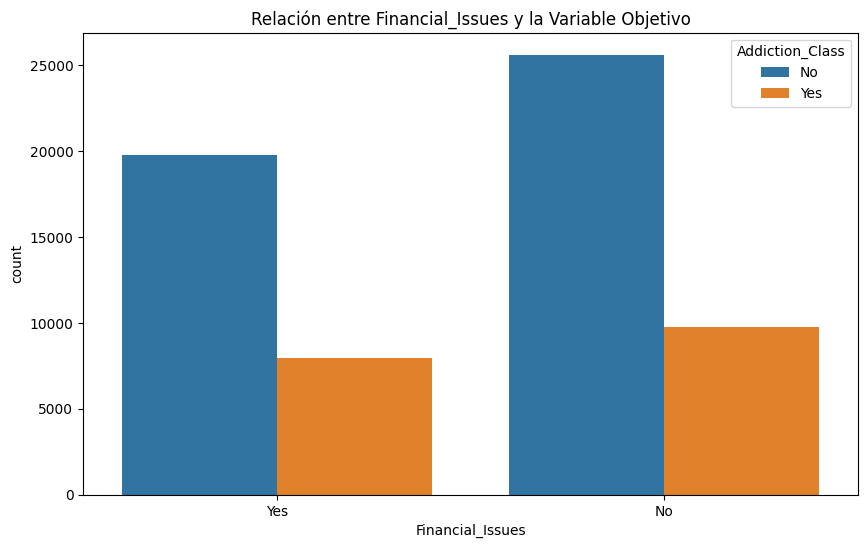

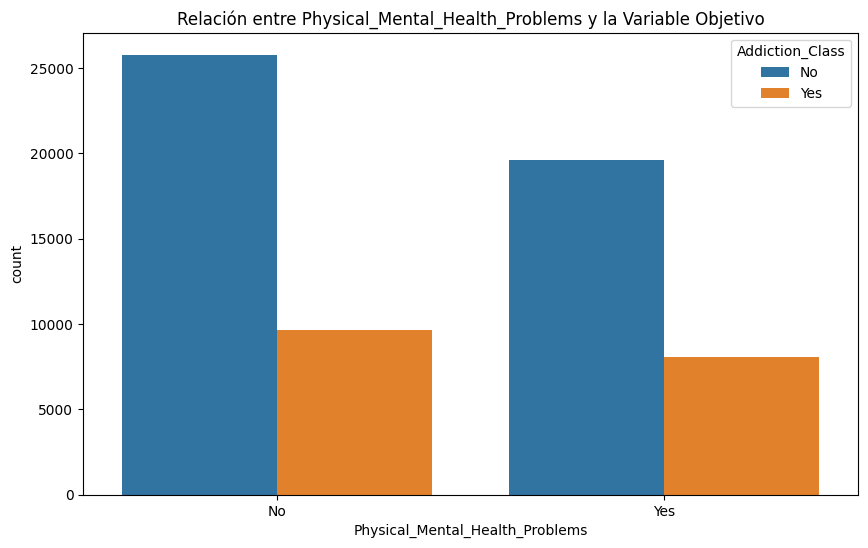

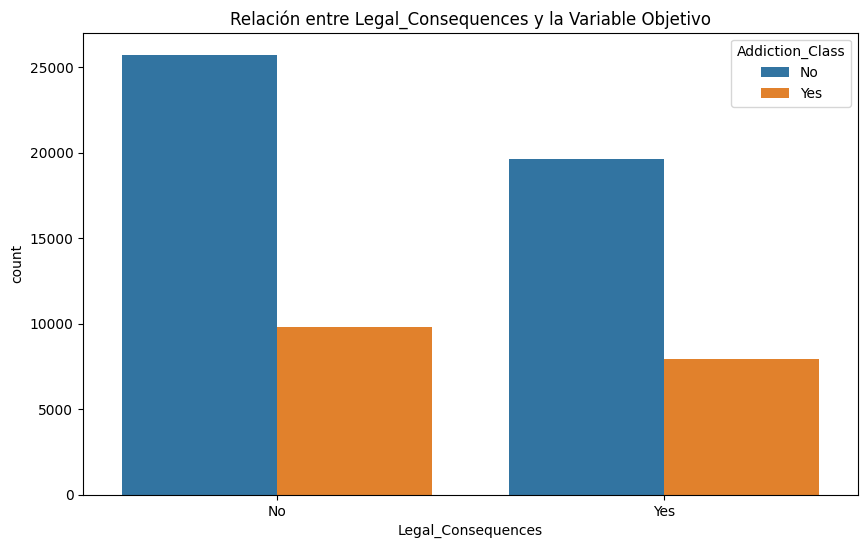

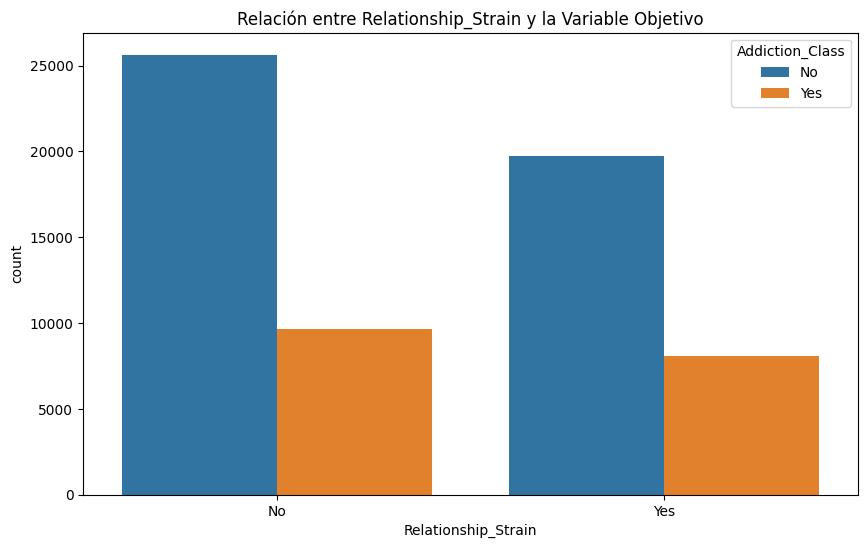

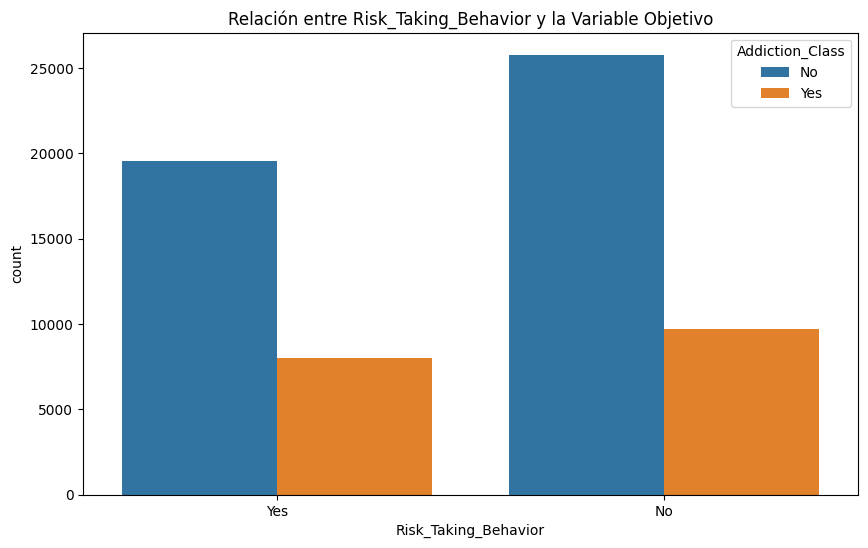

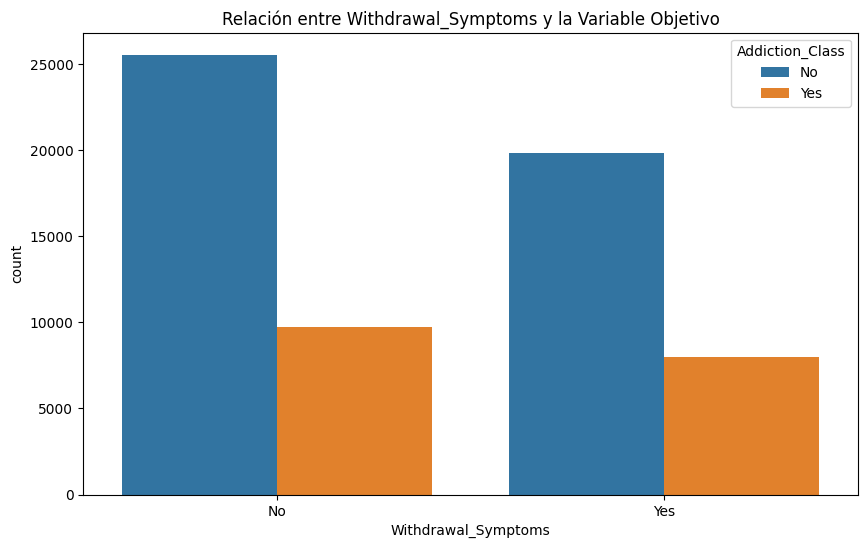

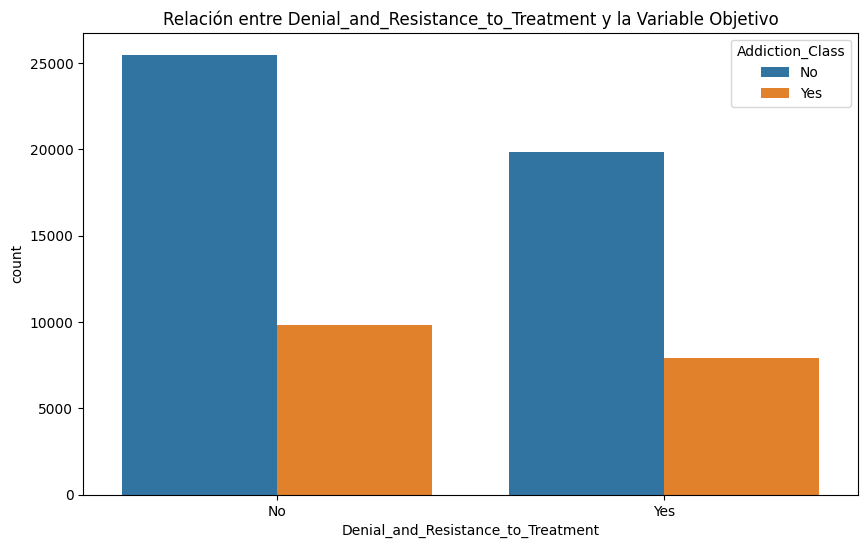

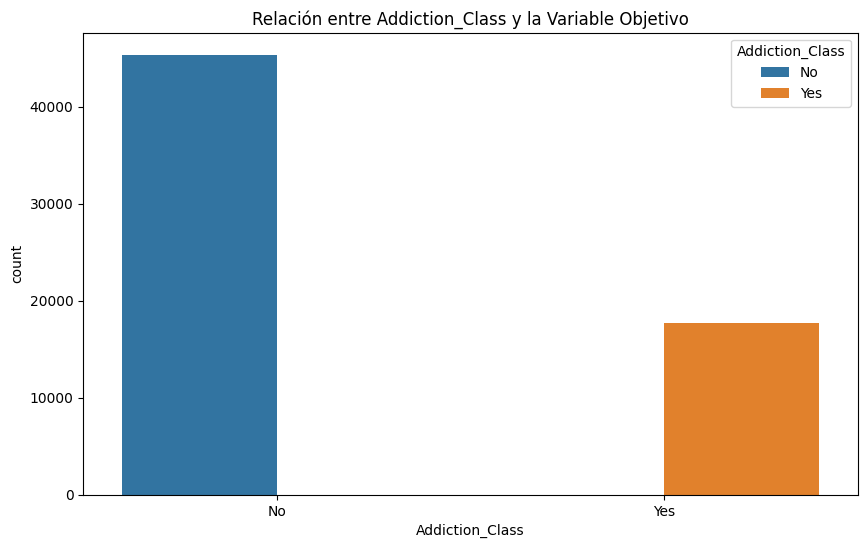

In [20]:
# Graficar la relación entre variables categóricas y la variable objetivo
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='Addiction_Class', data=df_train_imputed)
    plt.title(f'Relación entre {column} y la Variable Objetivo')
    plt.show()

Cathegorical correlation using V-Cramer

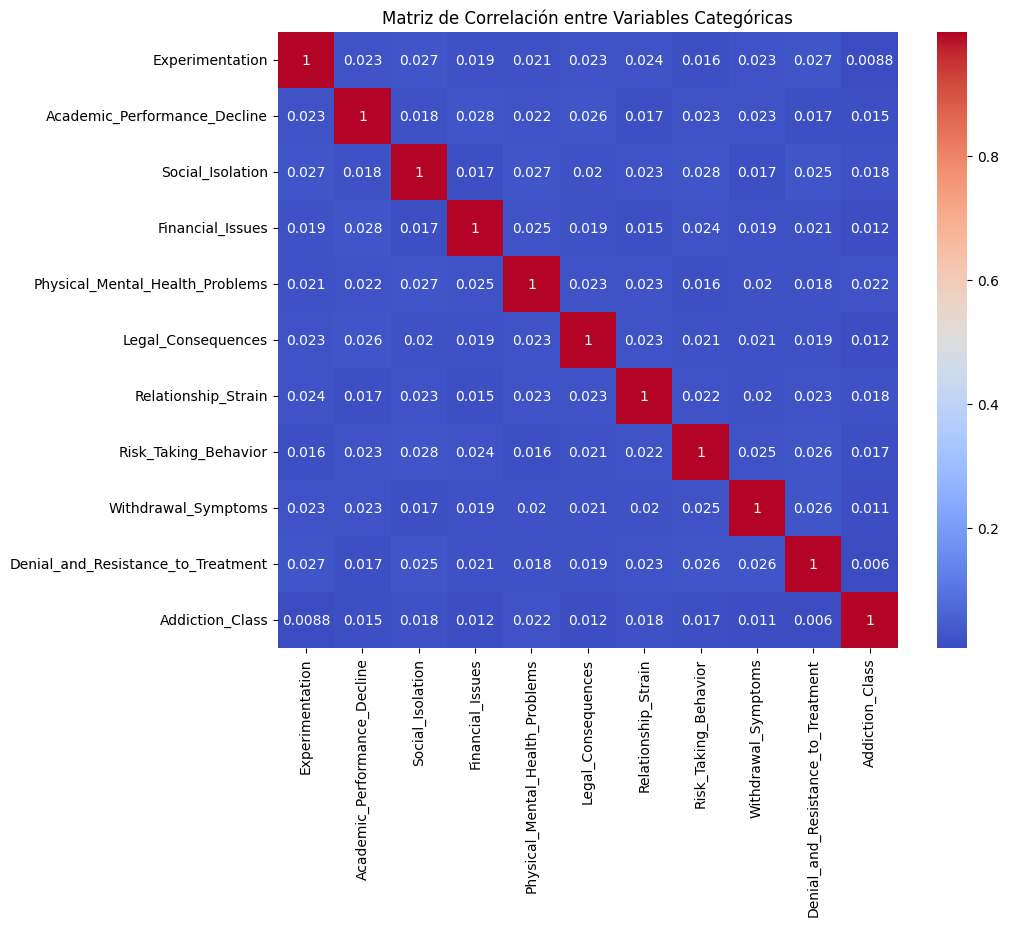

In [21]:
import seaborn as sns
from scipy.stats import chi2_contingency

# Calcular la correlación entre variables categóricas utilizando Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calcular matriz de correlación para variables categóricas
columns = df_train_imputed.select_dtypes(include=['object']).columns
corr_matrix = pd.DataFrame(index=columns, columns=columns)
for col1 in columns:
    for col2 in columns:
        corr_matrix.loc[col1, col2] = cramers_v(df_train_imputed[col1], df_train_imputed[col2])

# Convertir a float para el heatmap
corr_matrix = corr_matrix.astype(float)

# Visualizar matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre Variables Categóricas')
plt.show()

### 5. Classification algorithms

#### 5.1 Case 1: Imputed variables and inbalanced dataset: Result (71% accuracy as it is classifying all classes as non addicted)

In [22]:
# Función para codificar "yes" y "no" como 1 y 0
def binary_encode(df, columns):
    df_copy = df.copy()
    for column in columns:
        df_copy[column] = df_copy[column].map({'Yes': 1, 'No': 0})
    return df_copy

In [23]:
# Identificar columnas categóricas
categorical_columns = df_train_imputed.select_dtypes(include=['object']).columns

# Codificar las variables categóricas en ambos conjuntos de datos
df_train_encoded = binary_encode(df_train_imputed, categorical_columns)

In [24]:
categorical_columns

Index(['Experimentation', 'Academic_Performance_Decline', 'Social_Isolation',
       'Financial_Issues', 'Physical_Mental_Health_Problems',
       'Legal_Consequences', 'Relationship_Strain', 'Risk_Taking_Behavior',
       'Withdrawal_Symptoms', 'Denial_and_Resistance_to_Treatment',
       'Addiction_Class'],
      dtype='object')

Shuffle the data

In [25]:
# Assuming df is your DataFrame
df_train_encoded = df_train_encoded.sample(frac=1, random_state=67).reset_index(drop=True)

In [26]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = df_train_encoded.drop('Addiction_Class', axis=1)  # Reemplaza 'target' con el nombre de tu variable objetivo
y = df_train_encoded['Addiction_Class']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Lista de modelos
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('SVM', SVC()),
    ('KNN', KNeighborsClassifier())
]

In [28]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Diccionario para almacenar los resultados
results = {}

for name, model in models:
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = cv_scores
    print(f"{name}: Mean Accuracy = {np.mean(cv_scores):.2f}, Std = {np.std(cv_scores):.2f}")

Logistic Regression: Mean Accuracy = 0.72, Std = 0.00
Random Forest: Mean Accuracy = 0.72, Std = 0.00
Gradient Boosting: Mean Accuracy = 0.72, Std = 0.00
SVM: Mean Accuracy = 0.72, Std = 0.00
KNN: Mean Accuracy = 0.66, Std = 0.00


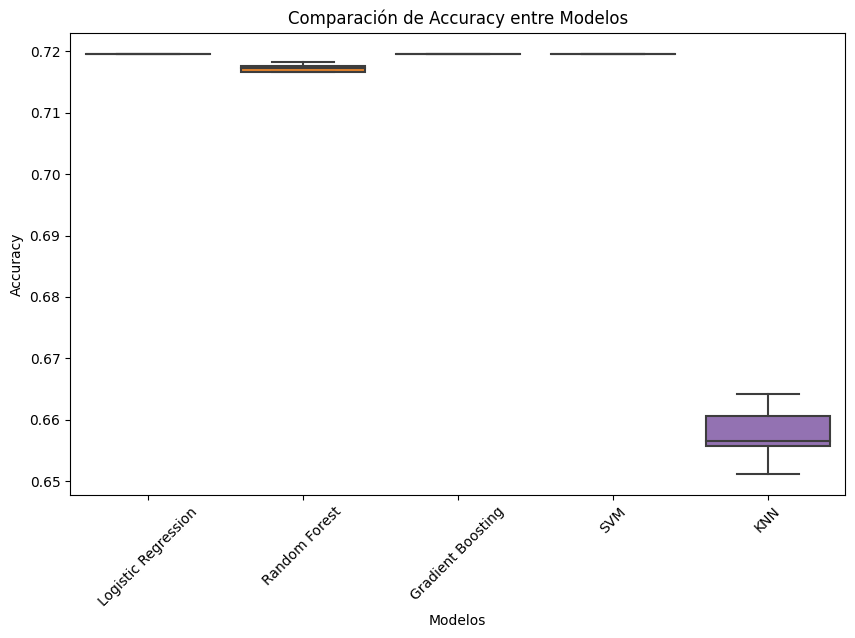

In [29]:
# Convertir los resultados en un DataFrame para facilitar la visualización
results_df = pd.DataFrame(results)

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=results_df)
plt.title('Comparación de Accuracy entre Modelos')
plt.ylabel('Accuracy')
plt.xlabel('Modelos')
plt.xticks(rotation=45)
plt.show()

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluar cada modelo en el conjunto de prueba
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Resultados para {name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

Resultados para Logistic Regression:
Accuracy: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84      9060
           1       0.00      0.00      0.00      3558

    accuracy                           0.72     12618
   macro avg       0.36      0.50      0.42     12618
weighted avg       0.52      0.72      0.60     12618

Confusion Matrix:
[[9060    0]
 [3558    0]]




/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Resultados para Random Forest:
Accuracy: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.83      9060
           1       0.34      0.01      0.01      3558

    accuracy                           0.72     12618
   macro avg       0.53      0.50      0.42     12618
weighted avg       0.61      0.72      0.60     12618

Confusion Matrix:
[[9015   45]
 [3535   23]]


Resultados para Gradient Boosting:
Accuracy: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84      9060
           1       0.00      0.00      0.00      3558

    accuracy                           0.72     12618
   macro avg       0.36      0.50      0.42     12618
weighted avg       0.52      0.72      0.60     12618

Confusion Matrix:
[[9060    0]
 [3558    0]]




/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Resultados para SVM:
Accuracy: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84      9060
           1       0.00      0.00      0.00      3558

    accuracy                           0.72     12618
   macro avg       0.36      0.50      0.42     12618
weighted avg       0.52      0.72      0.60     12618

Confusion Matrix:
[[9060    0]
 [3558    0]]




/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Resultados para KNN:
Accuracy: 0.66
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.86      0.78      9060
           1       0.28      0.14      0.19      3558

    accuracy                           0.66     12618
   macro avg       0.50      0.50      0.49     12618
weighted avg       0.60      0.66      0.62     12618

Confusion Matrix:
[[7819 1241]
 [3066  492]]




We can see that all the predictions are being taken to the class 0. We are going to downsampling the major class and check the results

#### 5.2 Inputted variables and downsampling of the major class (Result: 52% accuracy balanced in both classes)

In [31]:
df_train_encoded['Addiction_Class'].value_counts()

Addiction_Class
0    45375
1    17711
Name: count, dtype: int64

In [32]:
df_train_encoded.shape

(63086, 11)

In [33]:
from sklearn.utils import resample

# Separar las clases
df_majority = df_train_encoded[df_train_encoded['Addiction_Class'] == 0]
df_minority = df_train_encoded[df_train_encoded['Addiction_Class'] == 1]

# Submuestrear la clase mayoritaria
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # muestra sin reemplazo
                                   n_samples=len(df_minority),     # para igualar el número de minoritarios
                                   random_state=42)  # para reproducibilidad

# Combinar clase minoritaria y submuestreada mayoritaria
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Mostrar la distribución de clases
print(df_balanced['Addiction_Class'].value_counts())

Addiction_Class
0    17711
1    17711
Name: count, dtype: int64


In [34]:
# Assuming df is your DataFrame
df_balanced = df_balanced.sample(frac=1, random_state=67).reset_index(drop=True)

In [35]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = df_balanced.drop('Addiction_Class', axis=1)  # Reemplaza 'target' con el nombre de tu variable objetivo
y = df_balanced['Addiction_Class']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Lista de modelos
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier())
]

In [37]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Diccionario para almacenar los resultados
results = {}

for name, model in models:
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = cv_scores
    print(f"{name}: Mean Accuracy = {np.mean(cv_scores):.2f}, Std = {np.std(cv_scores):.2f}")

Logistic Regression: Mean Accuracy = 0.51, Std = 0.01
Random Forest: Mean Accuracy = 0.51, Std = 0.00
Gradient Boosting: Mean Accuracy = 0.51, Std = 0.01
KNN: Mean Accuracy = 0.50, Std = 0.01


In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluar cada modelo en el conjunto de prueba
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Resultados para {name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

Resultados para Logistic Regression:
Accuracy: 0.53
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.51      0.52      3567
           1       0.53      0.55      0.54      3518

    accuracy                           0.53      7085
   macro avg       0.53      0.53      0.53      7085
weighted avg       0.53      0.53      0.53      7085

Confusion Matrix:
[[1837 1730]
 [1599 1919]]


Resultados para Random Forest:
Accuracy: 0.52
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.54      0.53      3567
           1       0.52      0.51      0.51      3518

    accuracy                           0.52      7085
   macro avg       0.52      0.52      0.52      7085
weighted avg       0.52      0.52      0.52      7085

Confusion Matrix:
[[1916 1651]
 [1736 1782]]


Resultados para Gradient Boosting:
Accuracy: 0.52
Classification Report:
              precision    recall  

#### 5.3 Dropping missing values and inbalanced tarjet class (Similar result as imputting missing values: 72% accuracy)

In [39]:
# Train dataset
df_train = pd.read_csv(r"/kaggle/input/students-drugs-addiction-dataset/Students drugs Addiction Dataset/Student_Drugs_Addiction_Training_ Dataset/student_addiction_dataset_train.csv", delimiter=',')

# Test dataset
df_test = pd.read_csv(r"/kaggle/input/students-drugs-addiction-dataset/Students drugs Addiction Dataset/Student_Drugs_Addiction_Testing_ Dataset/student_addiction_dataset_test.csv", delimiter=',')

In [40]:
# Combinar los conjuntos de datos
df_train = pd.concat([df_train, df_test], ignore_index=True)

In [41]:
df_train = df_train.dropna()

In [42]:
df_train["Addiction_Class"].value_counts()

Addiction_Class
No     26940
Yes    10648
Name: count, dtype: int64

In [43]:
# Identificar columnas categóricas
categorical_columns = df_train.select_dtypes(include=['object']).columns

# Codificar las variables categóricas en ambos conjuntos de datos
df_train = binary_encode(df_train, categorical_columns)

In [44]:
# Assuming df is your DataFrame
df_train_encoded = df_train.sample(frac=1, random_state=67).reset_index(drop=True)

In [45]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = df_train_encoded.drop('Addiction_Class', axis=1)  # Reemplaza 'target' con el nombre de tu variable objetivo
y = df_train_encoded['Addiction_Class']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Lista de modelos
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier())
]

In [47]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Diccionario para almacenar los resultados
results = {}

for name, model in models:
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = cv_scores
    print(f"{name}: Mean Accuracy = {np.mean(cv_scores):.2f}, Std = {np.std(cv_scores):.2f}")

Logistic Regression: Mean Accuracy = 0.72, Std = 0.00
Random Forest: Mean Accuracy = 0.71, Std = 0.00
Gradient Boosting: Mean Accuracy = 0.72, Std = 0.00
KNN: Mean Accuracy = 0.65, Std = 0.00


In [48]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluar cada modelo en el conjunto de prueba
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Resultados para {name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

Resultados para Logistic Regression:
Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      5354
           1       0.00      0.00      0.00      2164

    accuracy                           0.71      7518
   macro avg       0.36      0.50      0.42      7518
weighted avg       0.51      0.71      0.59      7518

Confusion Matrix:
[[5354    0]
 [2164    0]]




/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Resultados para Random Forest:
Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.99      0.83      5354
           1       0.23      0.01      0.02      2164

    accuracy                           0.71      7518
   macro avg       0.47      0.50      0.42      7518
weighted avg       0.57      0.71      0.59      7518

Confusion Matrix:
[[5293   61]
 [2146   18]]


Resultados para Gradient Boosting:
Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      5354
           1       0.00      0.00      0.00      2164

    accuracy                           0.71      7518
   macro avg       0.36      0.50      0.42      7518
weighted avg       0.51      0.71      0.59      7518

Confusion Matrix:
[[5354    0]
 [2164    0]]




/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Resultados para KNN:
Accuracy: 0.64
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.76      5354
           1       0.27      0.16      0.20      2164

    accuracy                           0.64      7518
   macro avg       0.49      0.49      0.48      7518
weighted avg       0.58      0.64      0.60      7518

Confusion Matrix:
[[4441  913]
 [1825  339]]


